<a href="https://colab.research.google.com/github/apmoore1/target-extraction/blob/master/tutorials/Dataset_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%capture
!pip install git+git://github.com/apmoore1/target-extraction.git@master#egg=target-extraction

# Dataset Statistics
In this notebook we will explore the difference ways of producing dataset statistics. The statistics that we will explore depend on the task in Target Based Sentiment Anlsysis you are exploring. Currently we support two different statistics:
1. Target Extraction (TE) statistics.
2. Target Sentiment (TS) statistics.

For each task we will show the statistics for some well known datasets (more datasets will be added in the future):
1. [SemEval 2014 Laptop dataset](https://www.aclweb.org/anthology/S14-2004.pdf) (Laptop) [train](http://metashare.ilsp.gr:8080/repository/browse/semeval-2014-absa-train-data-v20-annotation-guidelines/683b709298b811e3a0e2842b2b6a04d7c7a19307f18a4940beef6a6143f937f0/), [test](http://metashare.ilsp.gr:8080/repository/browse/semeval-2014-absa-test-data-gold-annotations/b98d11cec18211e38229842b2b6a04d77591d40acd7542b7af823a54fb03a155/) data. Pontiki et al. 2014.
2. [SemEval 2014 Restaurant dataset](https://www.aclweb.org/anthology/S14-2004.pdf) (Restaurant) [train](http://metashare.ilsp.gr:8080/repository/browse/semeval-2014-absa-train-data-v20-annotation-guidelines/683b709298b811e3a0e2842b2b6a04d7c7a19307f18a4940beef6a6143f937f0/), [test](http://metashare.ilsp.gr:8080/repository/browse/semeval-2014-absa-test-data-gold-annotations/b98d11cec18211e38229842b2b6a04d77591d40acd7542b7af823a54fb03a155/) data (same links as the Laptop data). Pontiki et al. 2014.
3. [Election Twitter dataset](https://www.aclweb.org/anthology/E17-1046/) (Election). Wang et al. 2017
4. [MAMS Restaurant dataset](https://www.aclweb.org/anthology/D19-1654.pdf) (MAMS - ATSA version). Jiang et al. 2019

In the last section we show how to detect if two datasets/splits contain the same samples.


----------------------------------------------------------------------

Below we upload the datasets for the SemEval datasets, and download the datasets for the rest. The SemEval datasets cannot be downloaded as their licenses do not allow the datasets to be avliable online without yourself signing an agreement, but all datasets are **free**.

In [0]:
from collections import defaultdict
import itertools
from pathlib import Path

from google.colab import files
from target_extraction.dataset_parsers import wang_2017_election_twitter_test
from target_extraction.dataset_parsers import wang_2017_election_twitter_train
from target_extraction.dataset_parsers import multi_aspect_multi_sentiment_atsa
from target_extraction.dataset_parsers import semeval_2014
from target_extraction.data_types import TargetTextCollection

# SemEval 2014 Laptop and Restaurant
semeval_dataset_fp = {'Laptop Test': Path('Laptops_Test_Gold.xml'),
                      'Laptop Train': Path('Laptop_Train_v2.xml'),
                      'Restaurant Test': Path('Restaurants_Test_Gold.xml'),
                      'Restaurant Train': Path('Restaurants_Train_v2.xml')}
semeval_dataset = defaultdict(dict)
for dataset_name, fp in semeval_dataset_fp.items():
  if not fp.exists():
    print(f'Upload {dataset_name}')
    files.upload()
  semeval_dataset[dataset_name]['normal'] = semeval_2014(fp, conflict=False)
  semeval_dataset[dataset_name]['conflict'] = semeval_2014(fp, conflict=True)
# SemEval Laptop and Restaurant (Conflict Versions)
laptop_train_conflict = semeval_dataset['Laptop Train']['conflict']
laptop_train_conflict.name = 'Laptop C (Train)'
laptop_test_conflict = semeval_dataset['Laptop Test']['conflict']
laptop_test_conflict.name = 'Laptop C (Test)'
laptop_combined_conflict = TargetTextCollection.combine(laptop_train_conflict, laptop_test_conflict)
laptop_combined_conflict.name = 'Laptop C'

restaurant_train_conflict = semeval_dataset['Restaurant Train']['conflict']
restaurant_train_conflict.name = 'Restaurant C (Train)'
restaurant_test_conflict = semeval_dataset['Restaurant Test']['conflict']
restaurant_test_conflict.name = 'Restaurant C (Test)'
restaurant_combined_conflict = TargetTextCollection.combine(restaurant_train_conflict, restaurant_test_conflict)
restaurant_combined_conflict.name = 'Restaurant C'
# MAMS
mams_train = multi_aspect_multi_sentiment_atsa('train')
mams_val = multi_aspect_multi_sentiment_atsa('val')
mams_test = multi_aspect_multi_sentiment_atsa('test')
mams_train.name = 'MAMS (Train)'
mams_val.name = 'MAMS (Val)'
mams_test.name = 'MAMS (Test)'
mams_combined = TargetTextCollection.combine(mams_train, mams_val, mams_test)
mams_combined.name = 'MAMS'
# Election
election_train = wang_2017_election_twitter_train()
election_test = wang_2017_election_twitter_test()
election_train.name = 'Election (Train)'
election_test.name = 'Election (Test)'
election_combined = TargetTextCollection.combine(election_train, election_test)
election_combined.name = 'Election'
# Target Extraction datasets
target_exraction_split_datasets = [laptop_train_conflict, laptop_test_conflict, 
                                   restaurant_train_conflict, restaurant_test_conflict,
                                   mams_train, mams_val, mams_test, election_train, 
                                   election_test]
target_exraction_datasets = [laptop_combined_conflict, restaurant_combined_conflict, 
                             mams_combined, election_combined]

## Target Extraction
This is the task of extracting targets words from text [Pontiki et al. 2014](https://www.aclweb.org/anthology/S14-2004.pdf) (Also known as *aspect term extraction*). Below we show the statistics for these datasets where the columns mean the following:

1. Name -- this comes from the collection's name attribute
2. No. Sentences -- number of sentences in the collection
3. No. Sentences(t) -- number of sentence that contain targets.
4. No. Targets -- number of targets
5. No. Uniq Targets -- number of unique targets
6. ATS -- Average Target per Sentence (ATS)
7. ATS(t) -- ATS but where all sentences in the collection must contain at least one target.
8. TL (1) -- Percentage of targets that are length 1 based on the number of tokens.
9. TL (2) -- Percentage of targets that are length 2 based on the number of tokens.
10. TL (3+) -- Percentage of targets that are length 3+ based on the number of tokens.   
11. Mean Sent L -- Mean sentence length
12. Mean Sent L(t) -- `Mean Sent L` but where all sentences in the collection must contain at least one target.

In [4]:
from target_extraction.analysis.dataset_statistics import dataset_target_extraction_statistics
dataset_target_extraction_statistics(target_exraction_split_datasets, dataframe_format=True)

,Name,No. Sentences,No. Sentences(t),No. Targets,No. Uniq Targets,ATS,ATS(t),TL 1 %,TL 2 %,TL 3+ %,Mean Sentence Length,Mean Sentence Length(t)
0,Laptop C (Train),3045,1488,2358,955,0.77,1.58,62.85,27.06,10.09,16.91,19.74
1,Laptop C (Test),800,422,654,393,0.82,1.55,55.50,31.04,13.46,14.86,16.29
2,Restaurant C (Train),3041,2021,3693,1212,1.21,1.83,75.22,16.25,8.53,15.62,17.38
3,Restaurant C (Test),800,606,1134,522,1.42,1.87,71.60,18.08,10.32,15.95,16.53
4,MAMS (Train),4297,4297,11186,2410,2.60,2.60,82.15,11.56,6.29,26.27,26.27
5,MAMS (Val),500,500,1332,496,2.66,2.66,81.91,11.26,6.83,27.17,27.17
6,MAMS (Test),500,500,1336,507,2.67,2.67,80.46,13.85,5.69,27.39,27.39
7,Election (Train),3210,3182,9358,1849,2.92,2.94,81.82,15.99,2.19,26.31,26.31
8,Election (Test),867,863,2541,751,2.93,2.94,80.44,17.36,2.20,26.38,26.37


The **C** beside the Laptop and Restaurant dataset means that the *conflict* sentiment label samples are included. These *conflict* sentiment samples are normally included when evaluating within the target extraction task but excluded for the sentiment task due to being a very underepresented sentiment class.

As we can see from above the datasets are very different but within the datasets the differences between the splits is fairly small. Therefore below we show the dataset statistics when all splits are combined (The reason why there is one sample missing in from the Laptop dataset is due to a sample being both in train and test splits thus the duplicate is removed when combined):

In [5]:
dataset_target_extraction_statistics(target_exraction_datasets, dataframe_format=True)

,Name,No. Sentences,No. Sentences(t),No. Targets,No. Uniq Targets,ATS,ATS(t),TL 1 %,TL 2 %,TL 3+ %,Mean Sentence Length,Mean Sentence Length(t)
0,Laptop C,3844,1909,3011,1194,0.78,1.58,61.24,27.93,10.83,16.48,18.97
1,Restaurant C,3841,2627,4827,1545,1.26,1.84,74.37,16.68,8.95,15.69,17.18
2,MAMS,5297,5297,13854,2877,2.62,2.62,81.96,11.75,6.29,26.46,26.46
3,Election,4077,4045,11899,2179,2.92,2.94,81.53,16.28,2.19,26.33,26.32


The table above shows that in general the Laptop and Restaurant datasets are fairly similar with respect to ATS. The Laptop dataset contains the most multi-word targets relative to the overall size of the dataset. The ATS values of MAMS and Election is much larger which is expected as the MAMS dataset was created to contain at least two targets per text, and the Election dataset comes from Twitter which is expected to mention multiple targets per text. The largest difference between the datasets is mainly the size where the MAMS is by far the largest dataset. 

The MAMS dataset was created in a slightly artifical manner where all sentences must contain at least two targets, of which in the wild this is not always the case as shown by the Restaurant dataset which was taken from the same data source (Citysearch New York dataset by [Ganu et al. 2009](https://www.semanticscholar.org/paper/Beyond-the-Stars%3A-Improving-Rating-Predictions-Text-Ganu-Elhadad/1b41abbf9d3707a1a5c0fcf8e1f7734da0e61703)). Furthermore as we will see later they removed all sentences that contain multiple targets with the same sentiment. This dataset was designed to be a challenge dataset, where it is difficult to perform well on it using just a text classifier and ignoring the target information.

We can also see from the table above that the majority of datasets contain targets that only contain one token and thus the datasets contain very few targets with multiple tokens. This can be seen better from the plot below where 95% of all targets in all of the datasets contain three or less tokens in the target:

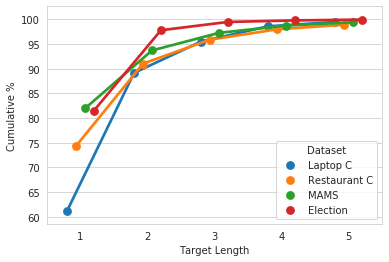

In [6]:
import seaborn as sns
sns.set_style("whitegrid")
from target_extraction.tokenizers import spacy_tokenizer
from target_extraction.analysis.dataset_plots import target_length_plot

_ = target_length_plot(target_exraction_datasets, 'targets', spacy_tokenizer(), 
                       cumulative_percentage=True, max_target_length=5)

Furthermore the sentence length of the datasets are very different. The Laptop and Restaurant datasets contain similar length sentences, where as the MAMS and Election both contain longer sentences. These longer sentences in the case for Election is most likely due to the character limit allowed on Twitter. For the MAMS case the reason for it having much larger sentence lengths than the Restaurant dataset is most likely due to having to contain multiple targets in a sentence. Furthermore the sentence length of the Election and MAMS are similar on average but when plotted they are very different as shown below:

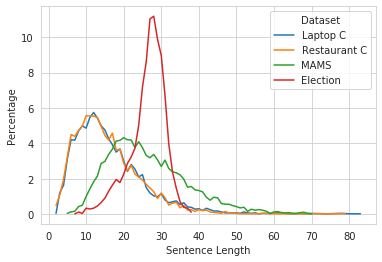

In [7]:
from target_extraction.analysis.dataset_plots import sentence_length_plot

_ = sentence_length_plot(target_exraction_datasets, spacy_tokenizer(), 
                         sentences_with_targets_only=False)

As can be seen the Laptop and Restaurant datasets are again very similar. The Election dataset on the other hand compared to the others contains this spike hence giving some validity to the character limit theory.

## Target Sentiment

As stated above normally the conflict label from the Laptop and Restaurant datasets are removed thus below we load the datasets without the conflict label:

In [0]:
# SemEval Laptop and Restaurant (Conflict Versions)
laptop_train = semeval_dataset['Laptop Train']['normal']
laptop_train.name = 'Laptop (Train)'
laptop_test = semeval_dataset['Laptop Test']['normal']
laptop_test.name = 'Laptop (Test)'
laptop_combined = TargetTextCollection.combine(laptop_train, laptop_test)
laptop_combined.name = 'Laptop'

restaurant_train = semeval_dataset['Restaurant Train']['normal']
restaurant_train.name = 'Restaurant (Train)'
restaurant_test = semeval_dataset['Restaurant Test']['normal']
restaurant_test.name = 'Restaurant (Test)'
restaurant_combined = TargetTextCollection.combine(restaurant_train, 
                                                   restaurant_test)
restaurant_combined.name = 'Restaurant'

# Target Sentiment datasets
target_sentiment_split_datasets = [laptop_train, laptop_test, 
                                   restaurant_train, restaurant_test,
                                   mams_train, mams_val, mams_test, 
                                   election_train, election_test]
target_sentiment_datasets = [laptop_combined, restaurant_combined, 
                             mams_combined, election_combined]

Below we the table shows the same statistics as those in the Target Extraction table but with three extra columns:
1. POS (%) -- Number (Percentage) of positive targets
2. NEU (%) -- Number (Percentage) of neutral targets
3. NEG (%) -- Number (Percentage) of Negative targets

In [9]:
from target_extraction.analysis.dataset_statistics import dataset_target_sentiment_statistics
dataset_target_sentiment_statistics(target_sentiment_split_datasets, dataframe_format=True)

,Name,No. Sentences,No. Sentences(t),No. Targets,No. Uniq Targets,ATS,ATS(t),TL 1 %,TL 2 %,TL 3+ %,Mean Sentence Length,Mean Sentence Length(t),POS (%),NEU (%),NEG (%)
0,Laptop (Train),3045,1462,2313,945,0.76,1.58,62.86,27.02,10.12,16.91,19.71,987 (42.67),460 (19.89),866 (37.44)
1,Laptop (Test),800,411,638,389,0.80,1.55,54.86,31.50,13.64,14.86,16.09,341 (53.45),169 (26.49),128 (20.06)
2,Restaurant (Train),3041,1978,3602,1195,1.18,1.82,75.12,16.27,8.61,15.62,17.39,2164 (60.08),633 (17.57),805 (22.35)
3,Restaurant (Test),800,600,1120,520,1.40,1.87,71.25,18.30,10.45,15.95,16.59,728 (65.0),196 (17.5),196 (17.5)
4,MAMS (Train),4297,4297,11186,2410,2.60,2.60,82.15,11.56,6.29,26.27,26.27,3380 (30.22),5042 (45.07),2764 (24.71)
5,MAMS (Val),500,500,1332,496,2.66,2.66,81.91,11.26,6.83,27.17,27.17,403 (30.26),604 (45.35),325 (24.4)
6,MAMS (Test),500,500,1336,507,2.67,2.67,80.46,13.85,5.69,27.39,27.39,400 (29.94),607 (45.43),329 (24.63)
7,Election (Train),3210,3182,9358,1849,2.92,2.94,81.82,15.99,2.19,26.31,26.31,1366 (14.6),3615 (38.63),4377 (46.77)
8,Election (Test),867,863,2541,751,2.93,2.94,80.44,17.36,2.20,26.38,26.37,378 (14.88),957 (37.66),1206 (47.46)


As we found with the Target Extraction statistics in general the difference between the splits is negliable. **However** the differences between the laptop splits is different as can be seen, the train split contains more negative than neutral samples where as it is the inverse in the test split. In all cases though the datasets are not balanced with repsect to the sentiment labels suggesting that a re-balacning technique is require such as over or under sampling.

Below we show the statistics of the datasets when all of their splits are combined:

In [10]:
dataset_target_sentiment_statistics(target_sentiment_datasets, dataframe_format=True)

,Name,No. Sentences,No. Sentences(t),No. Targets,No. Uniq Targets,ATS,ATS(t),TL 1 %,TL 2 %,TL 3+ %,Mean Sentence Length,Mean Sentence Length(t),POS (%),NEU (%),NEG (%)
0,Laptop,3844,1872,2950,1181,0.77,1.58,61.12,28.00,10.88,16.48,18.92,1328 (45.02),628 (21.29),994 (33.69)
1,Restaurant,3841,2578,4722,1528,1.23,1.83,74.21,16.75,9.04,15.69,17.20,2892 (61.25),829 (17.56),1001 (21.2)
2,MAMS,5297,5297,13854,2877,2.62,2.62,81.96,11.75,6.29,26.46,26.46,4183 (30.19),6253 (45.13),3418 (24.67)
3,Election,4077,4045,11899,2179,2.92,2.94,81.53,16.28,2.19,26.33,26.32,1744 (14.66),4572 (38.42),5583 (46.92)


Below we also show the sentence lengths of the sentences that only contain targets. Unlike the plot before which contained sentences that do and **do not** contain targets. As we can see the plots are very similar.

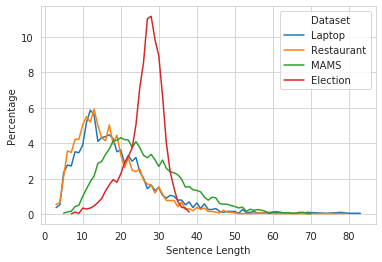

In [11]:
from target_extraction.analysis.dataset_plots import sentence_length_plot

_ = sentence_length_plot(target_sentiment_datasets, spacy_tokenizer(), 
                         sentences_with_targets_only=True)

## Detecting same samples between datasets/splits
Before we stated that the laptop dataset has the same sample in both train and test split. This was shown up before because the sample had the same unique identifier for the sentence, this can be seen below, where they both have the sentence/text id of 227 `'text_id': '227'`:

In [12]:
TargetTextCollection.same_data([laptop_train, laptop_test])

[([(TargetText({'text': 'If you want more information on macs I suggest going to apple.com and heading towards the macbook page for more information on the applications.', 'text_id': '227', 'targets': ['applications'], 'spans': [Span(start=131, end=143)], 'target_sentiments': ['neutral'], 'categories': None, 'category_sentiments': None, 'tokenized_text': ['If', 'you', 'want', 'more', 'information', 'on', 'macs', 'I', 'suggest', 'going', 'to', 'apple.com', 'and', 'heading', 'towards', 'the', 'macbook', 'page', 'for', 'more', 'information', 'on', 'the', 'applications', '.']}),
    TargetText({'text': 'If you want more information on macs I suggest going to apple.com and heading towards the macbook page for more information on the applications.', 'text_id': '227', 'targets': ['applications'], 'spans': [Span(start=131, end=143)], 'target_sentiments': ['neutral'], 'categories': None, 'category_sentiments': None, 'tokenized_text': ['If', 'you', 'want', 'more', 'information', 'on', 'macs', 'I

Thus you might be wondering if any of datasets might have samples that are the same within their own train/test splits. The `same_data` method identifies the same samples based on the `text_id` or exact same text within `text`. This can be seen below for the Restaurant dataset, where both samples contain different `text_id` but the same `text`:

In [13]:
TargetTextCollection.same_data([restaurant_train_conflict, restaurant_test_conflict])

[([(TargetText({'text': 'I would definitely go back -- if only for some of those exotic martinis on the blackboard.', 'text_id': '1715', 'targets': ['martinis'], 'spans': [Span(start=63, end=71)], 'target_sentiments': ['positive'], 'categories': ['food'], 'category_sentiments': ['positive'], 'tokenized_text': ['I', 'would', 'definitely', 'go', 'back', '--', 'if', 'only', 'for', 'some', 'of', 'those', 'exotic', 'martinis', 'on', 'the', 'blackboard', '.']}),
    TargetText({'text': 'I would definitely go back -- if only for some of those exotic martinis on the blackboard.', 'text_id': '11350031#590790#3', 'targets': ['martinis'], 'spans': [Span(start=63, end=71)], 'target_sentiments': ['positive'], 'categories': ['food', 'anecdotes/miscellaneous'], 'category_sentiments': ['positive', 'positive'], 'tokenized_text': ['I', 'would', 'definitely', 'go', 'back', '--', 'if', 'only', 'for', 'some', 'of', 'those', 'exotic', 'martinis', 'on', 'the', 'blackboard', '.']}))],
  ('Restaurant C (Train)

We can see from above that these two samples only have three differences:
1. `text_id` 
2. `categories`
3. `category_sentiments`
However the differences in `categories` is only one category and the other category they do share.

The MAMS and Election datasets do not contain any overlap between their train and test splits:

In [15]:
print(len(TargetTextCollection.same_data([mams_train, mams_val, mams_test])))
print(len(TargetTextCollection.same_data([election_train, election_test])))

0
0
